In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme()


In [483]:
employees = pd.read_csv("./data/empleados.csv")


## Ejercicio 1


**Enunciado**
C1: ¿Cuántas observaciones hay en la tabla? ¿Cuántas variables? ¿Hay datos ausentes? Si la respuesta
a la última pregunta es afirmativa, localiza esos datos ausentes indicando en qué filas y columnas se
encuentran. Después, antes de seguir adelante, elimina de la tabla las filas que contienen esos datos


In [484]:
num_rows, num_columns = employees.shape
print(f"Hay {num_rows} observaciones y {num_columns} variables en la tabla")

Hay 3528 observaciones y 21 variables en la tabla


In [485]:
missing_values = {}
for column in employees.columns:
    # If that column has no missing values, skip to the next column
    if employees[column].isna().sum() == 0:
        continue
    # Create a new entry in the missing_values dictionary wit the form column_name : [...indexes of missing values]
    rows = employees[employees[column].isna()].index.to_list()
    missing_values[column] = rows

print(missing_values)

{'DistanceFromHome': [30, 31, 32, 897, 898, 899, 1593, 1594, 1595], 'NumCompaniesWorked': [147, 148, 149, 1092, 1093, 1094]}


In [486]:
# Drop every row that contains a missing value
employees.dropna(inplace=True)

## Ejercicio 2


**Enunciado**
C2: Vamos a fijarnos en las tres últimas columnas de la tabla, que son:
RateType, Rate, Education_Field
En particular verás que las columnas Rate y RateType incumplen una de las condiciones que definen a
los conjuntos de datos limpios (tidy), porque la columna Rate mezcla los valores de más de una variable.
La variable correspondiente se indica en la columna Rate_type. Por otro lado, Education_Field
incumple otra de esas condiciones, porque cada fila de esa tabla combina los valores de dos variable. En
este apartado debes limpiar el conjunto de datos utilizando las herramientas del tidyverse. Visualiza
el resultado usando select para que la salida del código muestre exclusivamente las variables que se
han modificado en este apartado (¡cuidado, no modifiques los datos al hacer esto!)


**pista**: Las primeras 3 columnas se refieren al mismo empleado


In [487]:
employees["RateType"].value_counts()


RateType
DailyRate      1171
HourlyRate     1171
MonthlyRate    1171
Name: count, dtype: int64

Las columnas están agrupadas en grupos de 3 que se refieren al mismo empleado, i.e. columnas 1-3 son del empleado 1. La única información que no se repite es la de 'Rate' y 'RateType'


In [488]:
# Create a new temporal DataFrame df, which is a copy of every third row in employees
df = employees.copy()[0::3].reset_index(drop=True)
# Keep only the columns that are stay the same inside every group of 3
df.drop(["Rate", "RateType"], axis=1, inplace=True)

# Create 3 new columns in the data frame that contain all the information of ["Rate", "RateType"]
df["DailyRate"] = my_df.loc[0::3]["Rate"].reset_index(drop=True)
df["HourlyRate"] = my_df.loc[1::3]["Rate"].reset_index(drop=True)
df["MonthlyRate"] = my_df.loc[2::3]["Rate"].reset_index(drop=True)

# Split the 'Education_Field' column in 2
df[["Education", "Field"]] = df["Education_Field"].str.split("//", expand=True)
df.drop("Education_Field", axis=1, inplace=True)

# Assign employees to a copy of the df that we just constructed
employees = df.copy()
employees


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,DailyRate,HourlyRate,MonthlyRate,Education,Field
0,31,No,Travel_Rarely,Research_Development,23.0,Male,2,Healthcare_Representative,Very_High,Married,5582,0.0,No,Outstanding,10,2,9,0,1463,64,14408,Bachelor,Medical
1,31,Yes,Travel_Frequently,Research_Development,15.0,Male,1,Laboratory_Technician,High,Married,2610,1.0,No,Excellent,2,5,2,2,874,72,6233,Bachelor,Medical
2,30,No,Non-Travel,Research_Development,2.0,Female,1,Laboratory_Technician,Very_High,Single,2564,0.0,No,Excellent,12,2,11,7,1116,49,7181,Bachelor,Medical
3,28,Yes,Non-Travel,Research_Development,24.0,Male,3,Healthcare_Representative,Low,Single,8722,1.0,No,Excellent,10,2,10,7,1366,72,12355,College,Technical_Degree
4,32,No,Travel_Rarely,Sales,8.0,Male,2,Sales_Executive,Very_High,Married,6209,1.0,No,Excellent,10,4,10,7,604,56,11693,Bachelor,Medical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,50,No,Travel_Frequently,Research_Development,2.0,Female,4,Manager,Low,Married,17856,2.0,No,Outstanding,32,3,2,2,1421,30,9490,Bachelor,Medical
1167,22,No,Travel_Rarely,Research_Development,19.0,Male,1,Research_Scientist,Very_High,Married,2323,1.0,No,Outstanding,2,6,2,2,1256,80,11992,Below_College,Medical
1168,57,No,Travel_Rarely,Research_Development,24.0,Male,3,Healthcare_Representative,Very_High,Divorced,9439,3.0,Yes,Excellent,12,2,5,3,334,83,23402,College,Life_Sciences
1169,37,No,Travel_Frequently,Sales,21.0,Female,1,Sales_Representative,Very_High,Married,2973,5.0,No,Excellent,10,3,5,4,1231,54,21222,College,Medical


## Ejercicio 3


C3: Una vez limpios los datos: ¿de qué tipo son las variables del conjunto de datos? Usa la función
mutate_if de dplyr (o alternativamente usa across) para asegurarte de que todas las variables de
esta tabla que se han leído como character se convierten en factores. Mira la ayuda de mutate_if
para hacer esto si lo necesitas. Después haz una lista de variables cuantitativas y otra de variables
cualitativas (factores). ¿Cuáles, dentro de estas últimas, son factores ordenados (no es necesario incluir
el orden en el proceso de transformación de estos factores)?


In [489]:
employees.dtypes

Age                        int64
Attrition                 object
BusinessTravel            object
Department                object
DistanceFromHome         float64
Gender                    object
JobLevel                   int64
JobRole                   object
JobSatisfaction           object
MaritalStatus             object
MonthlyIncome              int64
NumCompaniesWorked       float64
OverTime                  object
PerformanceRating         object
TotalWorkingYears          int64
TrainingTimesLastYear      int64
YearsAtCompany             int64
YearsInCurrentRole         int64
DailyRate                  int64
HourlyRate                 int64
MonthlyRate                int64
Education                 object
Field                     object
dtype: object

In [493]:
# Get a list that contains all the column names for the columns with dtype == object
categorical_columns = employees.columns[employees.dtypes == "object"]

# Cast the categorical columns as type 'category'
employees[categorical_columns] = employees[categorical_columns].astype(
    "category")


In [494]:
# Make sure that the type change was successful
employees.dtypes

Age                         int64
Attrition                category
BusinessTravel           category
Department               category
DistanceFromHome          float64
Gender                   category
JobLevel                    int64
JobRole                  category
JobSatisfaction          category
MaritalStatus            category
MonthlyIncome               int64
NumCompaniesWorked        float64
OverTime                 category
PerformanceRating        category
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsInCurrentRole          int64
DailyRate                   int64
HourlyRate                  int64
MonthlyRate                 int64
Education                category
Field                    category
dtype: object

In [495]:
# Print data from all columns to make sure that the columns with type 'category' are indeed categories
pd.set_option("display.max_columns", None)
employees.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,DailyRate,HourlyRate,MonthlyRate,Education,Field
0,31,No,Travel_Rarely,Research_Development,23.0,Male,2,Healthcare_Representative,Very_High,Married,5582,0.0,No,Outstanding,10,2,9,0,1463,64,14408,Bachelor,Medical
1,31,Yes,Travel_Frequently,Research_Development,15.0,Male,1,Laboratory_Technician,High,Married,2610,1.0,No,Excellent,2,5,2,2,874,72,6233,Bachelor,Medical
2,30,No,Non-Travel,Research_Development,2.0,Female,1,Laboratory_Technician,Very_High,Single,2564,0.0,No,Excellent,12,2,11,7,1116,49,7181,Bachelor,Medical
3,28,Yes,Non-Travel,Research_Development,24.0,Male,3,Healthcare_Representative,Low,Single,8722,1.0,No,Excellent,10,2,10,7,1366,72,12355,College,Technical_Degree
4,32,No,Travel_Rarely,Sales,8.0,Male,2,Sales_Executive,Very_High,Married,6209,1.0,No,Excellent,10,4,10,7,604,56,11693,Bachelor,Medical


## Ejercicio 4


**Enunciado** C4: Representa gráficamente la distribución de la variable edad Age mediante un histograma con la
curva de densidad de la variable superpuesta. Recuerda que en este y otros apartados se valorará
positivamente el uso de ggplot. Representa también un boxplot de la variable edad. Opcionalmente
puedes usar un violinpot o añadir los puntos de la muestra (asegúrate en ese caso de que no impiden
ver el boxplot).


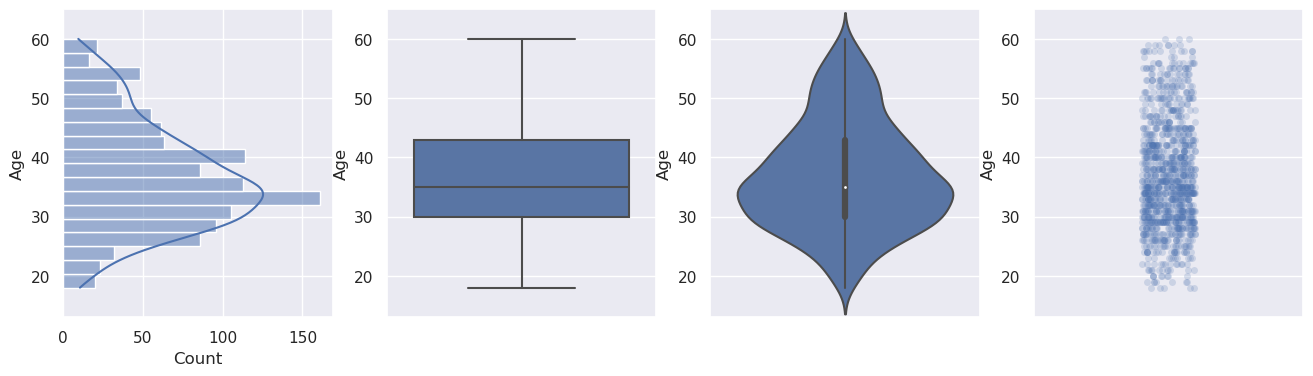

In [519]:
figure, axis = plt.subplots(1, 4, figsize=(16, 4))

sns.histplot(data=employees, y="Age", kde=True, ax=axis[0])
sns.boxplot(data=employees, y="Age", ax=axis[1])
sns.violinplot(data=employees, y="Age", ax=axis[2])
sns.stripplot(data=employees, y="Age", ax=axis[3], alpha=0.2)

# make the y axis consistent for all plots
for i in range(0, 4):
    axis[i].set_ylim(employees["Age"].min() - 5, employees["Age"].max() + 5)


## Ejercicio 5


C5: Estudia gráficamente (por ejemplo con boxplots) la relación entre la variable Age y la variable
Attrition. ¿Influye el género en esa relación? Usa los recursos gráficos de ggplot para discutir la
respuesta, lo que se busca es un juicio inicial basado en una exploración gráfica.


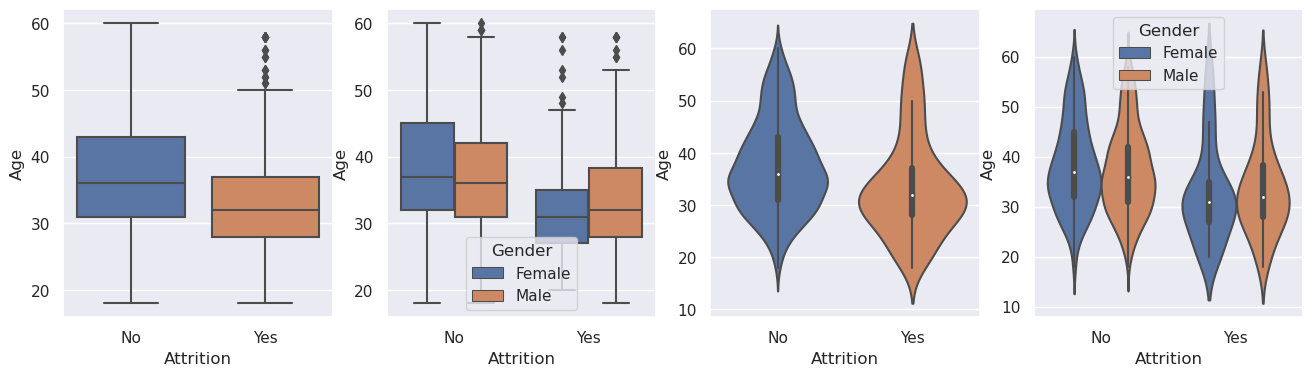

In [559]:
figure, axis = plt.subplots(1, 4, figsize=(16, 4))

sns.boxplot(data=employees, y="Age", x="Attrition", ax=axis[0])
sns.boxplot(data=employees, y="Age", x="Attrition", hue="Gender", ax=axis[1])
sns.violinplot(data=employees, y="Age", x="Attrition", ax=axis[2])
sns.violinplot(data=employees, y="Age", x="Attrition", hue="Gender", ax=axis[3])

sns.move_legend(axis[1], "lower center")
sns.move_legend(axis[3], "upper center")

Los empleados que sufren desgaste (attrition == True) tienden a ser más jóvenes. El género también influye: está relación está más marcada en las mujeres, i.e. la diferencia de edad entre los empleados desgastados y no desgastados es más pronunciada en las mujeres.


## Ejercicio 6


C6: Haz la tabla de frecuencias absolutas del factor JobSatisfaction. Después haz una representación
gráfica adecuada de esa tabla. Opcionales:
– juega con los argumentos fill y position de ggplot para incorporar al gráfico la información
de Attrition mediante colores.
– ten en cuenta que JobSatisfaction es un factor ordenado y trata de incorporar esa ordenación a
la representación gráfica. Indicación: usa la función factor y sus argumentos levels y ordered
para esto


In [527]:
# Order the categorical value 'JobSatisfaction' so that the absolute frequencies table and the plot follow the correct order
employees["JobSatisfaction"] = employees["JobSatisfaction"].cat.reorder_categories(
    ["Low", "Medium", "High", "Very_High"]
)


In [526]:
# Get the absolute frequencies for the categorical variable 'JobSatisfaction'
abs_freq = employees["JobSatisfaction"].value_counts().sort_index()
abs_freq


JobSatisfaction
High         352
Low          231
Medium       219
Very_High    369
Name: count, dtype: int64

In [533]:
# Create a contingency table for 'JobSatisfaction' and 'Attrition'
contingency_table = pd.crosstab(employees["JobSatisfaction"], employees["Attrition"])
contingency_table

Attrition,No,Yes
JobSatisfaction,,
Low,178,53
Medium,185,34
High,297,55
Very_High,330,39


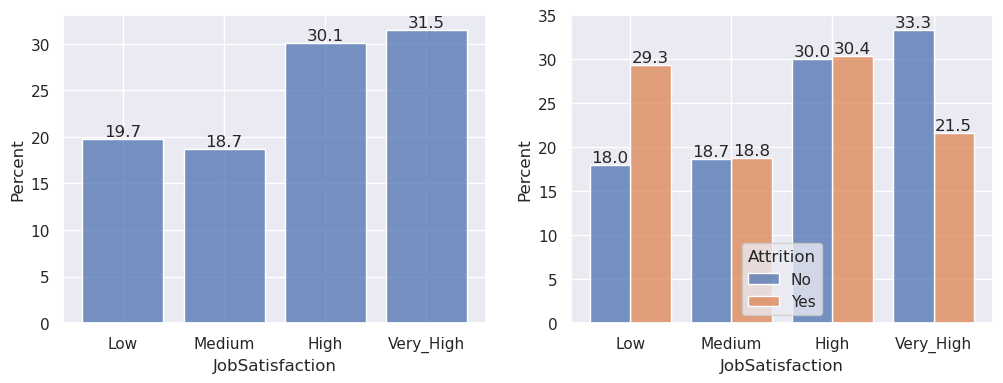

In [563]:
figure, axis = plt.subplots(1, 2, figsize=(12, 4))

# If input a categorical value to sns.histplot you get a bar chart with the frequency of each category
# With the parameter stat it's possible to display the absolute frequencies, relative frequencies, relative frequencies expressed as a percentage, ...

sns.histplot(
    data=employees, x="JobSatisfaction", ax=axis[0], stat="percent", shrink=0.8
)

sns.histplot(
    data=employees,
    x="JobSatisfaction",
    hue="Attrition",
    ax=axis[1],
    stat="percent",
    common_norm=False,
    multiple="dodge",
    shrink=0.8,
)

axis[0].bar_label(axis[0].containers[1], fmt="%.1f")
for i in range(0, 2):
    axis[1].bar_label(axis[1].containers[i], fmt="%.1f")
sns.move_legend(axis[1], "lower center")

## Ejercicio 7


C7: Calcula la mediana del salario mensual para cada departamento y cada nivel dentro de ese departamento. Ordena la respuesta de mayor a menor y asegúrate de que en la tabla de salida se muestran
las columnas relevantes.


In [568]:
df = employees.groupby(["Department", "JobLevel"])[
    "MonthlyIncome"].median().round(2)
df


Department            JobLevel
Human_Resources       1            2706.0
                      2            5910.0
                      3            9756.0
                      4           16799.0
                      5           19189.0
Research_Development  1            2700.0
                      2            5238.0
                      3           10293.0
                      4           16413.0
                      5           19326.0
Sales                 1            2575.5
                      2            5396.0
                      3            9419.0
                      4           15427.0
                      5           19068.0
Name: MonthlyIncome, dtype: float64

In [565]:
df.sort_values(ascending=False)

Department            JobLevel
Research_Development  5           19326.0
Human_Resources       5           19189.0
Sales                 5           19068.0
Human_Resources       4           16799.0
Research_Development  4           16413.0
Sales                 4           15427.0
Research_Development  3           10293.0
Human_Resources       3            9756.0
Sales                 3            9419.0
Human_Resources       2            5910.0
Sales                 2            5396.0
Research_Development  2            5238.0
Human_Resources       1            2706.0
Research_Development  1            2700.0
Sales                 1            2575.5
Name: MonthlyIncome, dtype: float64

## Ejercicio 8


C8: Si elegimos al azar un empleado cuyo nivel de satisfacción en el trabajo JobSatisfaction es
VeryHigh, calcula la probabilidad de que sea soltero. Si elegimos un empleado de la empresa al azar
¿cuál es la probabilidad de que sea una mujer que lleva más de cinco años en la empresa


In [572]:
very_high_satisfaction_employees = employees[
    employees["JobSatisfaction"] == "Very_High"
]

prob_single_given_veryHighSatisfaction = (
    very_high_satisfaction_employees["MaritalStatus"]
    .value_counts(normalize=True)
    .loc["Single"]
)

prob_single_given_veryHighSatisfaction

0.35501355013550134

In [599]:
((employees["Gender"] == "Female") & (employees["YearsAtCompany"] > 5)).mean()


0.19726729291204098

## Ejercicio 9


C9: Si elegimos 12 empleados de esta compañía al azar y con remplezamiento, ¿cuál es la probabilidad
de que 4 de ellos hayan trabajado en 3 o más compañías (NumCompaniesWorked)


In [597]:
from scipy.stats import binom

prob = (employees["NumCompaniesWorked"] >= 3).mean()
sample_size = 12
k = 4

binom.pmf(k, sample_size, prob).round(4)


0.2021

## Ejercicio 10


C10: Haz una tabla de contingencia (dos por dos) de Attrition frente a Overtime, la variable que
nos dice si un empleado hace o no horas extras. Supongamos que queremos usar Overtime como una
especie de prueba diagnóstica de los valores de Attrition, equiparando enfermo/sano con Attrition
Yes/No y test positivo/negativo con Overtime Yes/No. ¿Cuál es la tasa de falsos positivos de este test?
¿Cuál es la precisión del test? Opcional: ¿cuáles son su sensibilidad y especificidad?


In [602]:
contingency_table = pd.crosstab(employees["OverTime"], employees["Attrition"])
contingency_table

Attrition,No,Yes
OverTime,,
No,765,83
Yes,225,98


In [605]:
[true_negative, false_negative], [
    false_positive,
    true_positive,
] = contingency_table.to_numpy()
total = contingency_table.to_numpy().sum()


In [608]:
false_positive_rate = false_positive / (false_positive + true_positive)
false_positive_rate

0.6965944272445821

In [610]:
precision = (true_positive + true_negative) / total
precision

0.7369769427839453

## Ejercicio 11


C11: Asumiendo la normalidad de los datos, calcula un intervalo de confianza al 95% para la edad
medio de los empleados del departamento más numeroso de la empresa. Opcional: ¿crees que está
justificada la hipótesis de normalidad de esos datos?


In [ ]:
def get_confidence_interval(sample, confidence_level=0.95, distribution="StudentsT"):
    """
    Given a one-variable size-m sample and the desired confidence level, returns the confidence interval of the mean.

    Args:
        sample : (numpy.ndarray Shape (m)) Sample
        confidence_level: (float in [0,1]) Probability that the mean of the population falls inside the confidence interval
        distribution: ("StudentsT" or "Normal") Use "StudentsT" for small samples, and "Normal" for big samples


    Returns:
        confidence_interval: (numpy.ndarray Shape (2)) The interval where the mean of the population falls, with a probability of p = confidence_level
        delta: (float): half-width of the interval

    """

    # Probability that the population mean falls outside the confidence interval
    alpha = 1 - confidence_level

    # Use the specified distribution to calculate the critical point
    if distribution == "StudentsT":
        degrees_of_freedom = sample.size - 1
        critical_point = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)
    elif distribution == "Normal":
        critical_point = stats.norm.ppf(1 - alpha / 2, loc=0, scale=1)
    else:
        raise ValueError("distribution must be either 'StudentsT' or 'Normal")

    # Calculate the half-width (delta) and the confidence interval
    delta = critical_point * sample.std() / np.sqrt([sample.size])
    confidence_interval = sample.mean() + np.array([-1, +1]) * delta

    return confidence_interval, delta

In [ ]:
employees["Department"].value_counts()


Department
Research_Development    771
Sales                   350
Human_Resources          50
Name: count, dtype: int64

In [ ]:
sample = employees[employees["Department"] ==
                   "Research_Development"]["Age"].to_numpy()
confidence_level, delta = get_confidence_interval(
    sample, confidence_level=0.95, distribution="StudentsT"
)
confidence_level


array([36.42550118, 37.71198261])

<Axes: ylabel='Count'>

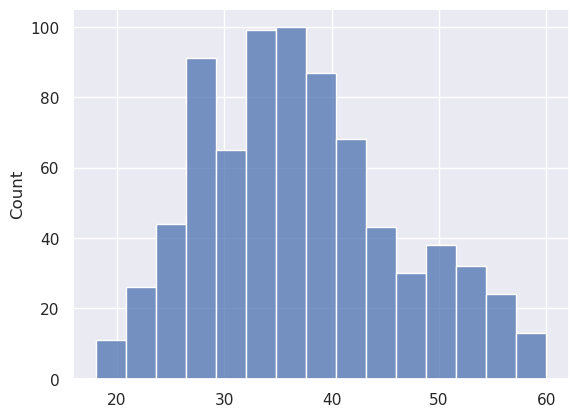

In [ ]:
sns.histplot(sample)

## Ejercicio 12


C12: Toma una muestra aleatoria y con remplazamiento de 20 empleados del departamento de ventas
y haz un contraste (al 95% de significación) de la hipótesis nula: la distancia media a su domicilio es
de 9 km. Asegúrate de mantener el comando set.seed como primera línea de tu respuesta en este
apartado para garantizar la reproducibilidad.


In [ ]:
employees["Department"].value_counts()


Department
Research_Development    771
Sales                   350
Human_Resources          50
Name: count, dtype: int64

In [ ]:
sample = employees[employees["Department"] == "Sales"].sample(n=20, random_state=0)[
    "DistanceFromHome"
]

mu0 = 9
n = sample.shape[0]
dof = n - 1
barX = sample.mean()
s = sample.std()

Tscore = (barX - mu0) / (s / np.sqrt(n))
print("The t score for this sample is {:.4}".format(Tscore))

pValue = stats.t.sf(Tscore, df=dof)
print("And the resulting p-value is: {:.4}".format(pValue))

significance_level = 0.95
alpha = 1 - significance_level
print(
    f"The p-value={round(pValue, 4)} is not smaller than alpha={round(alpha, 4)}. Therefore we cannot reject the null hypothesis."
)


The t score for this sample is 0.4341
And the resulting p-value is: 0.3346
The p-value=0.3346 is not smaller than alpha=0.05. Therefore we cannot reject the null hypothesis.


## Ejercicio 13


C13: Considerando los empleados del departamento Research_Development vamos a hacer un modelo
de regresión lineal para las dos variables:
x:YearsAtCompany y:MonthlyIncome
Construye el modelo usando la función lm y además dibuja el diagrama de dispersión de esas variables
junto con la recta de regresión obtenida. ¿Qué porcentaje de la variabilidad en el salario mensual se
explica con el modelo? ¿Cuánto se incrementa el salario mensual de un empleado de ese departamento
por cada año de antigüedad en la empresa?


<Axes: >

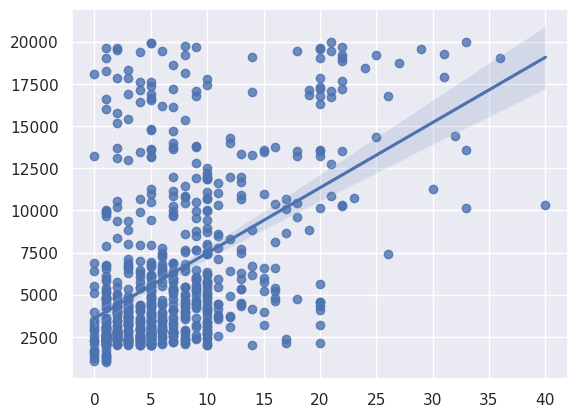

In [ ]:
x, y = (
    employees[employees["Department"] == "Research_Development"][
        ["YearsAtCompany", "MonthlyIncome"]
    ]
    .to_numpy()
    .T
)

sns.regplot(x=x, y=y)
